In [1]:
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import csv
import string

In [2]:
df = pd.read_pickle("Dataset/Tweets.pkl")
#df = pd.read_csv('Dataset\Tweets.csv', encoding='latin-1')

In [3]:
df=df.astype(str)

In [4]:
data=df

In [5]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords

In [6]:
def clean_data(data):
    #columnwise print number of rows containing blank values
    #print data.isnull().sum()
    
    #replace blank values in all the cells with 'nan'
    data.replace('',np.nan,inplace=True)
    #delete all the rows which contain at least one cell with nan value
    data.dropna(axis=0, how='any', inplace=True)
    
    #Check the number of rows containing blank values. This should be zero now as compared to first line of this function
    #print data.isnull().sum()
    #save output csv file
    #data.to_csv('labelled_dataset.csv', index=False)
    return data

In [7]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'lxml').get_text()  #remove html
    letters_only = re.sub("[^a-zA-Z]", " ", text)  # remove non-character
    words = letters_only.lower().split() # convert to lower case 
    
    if remove_stopwords: # remove stopword
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True: # stemming
         #stemmer = PorterStemmer()
        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:  # split text
        return (words)
    
    return( " ".join(words))

In [8]:
    data = clean_data(data)

In [9]:
X= df[['Tweets', 'Emotion']].agg('-'.join, axis=1)
y=df['Writer']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0)
 

In [11]:
def modelEvaluation(predictions, y_test_set):
    return format(accuracy_score(y_test_set, predictions)*100)
    
    

In [12]:
#Fit and transform the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
x_train_tfidf = tfidf.fit_transform(x_train)
  
   

In [13]:
    x_train_cleaned = []
    x_test_cleaned = []

    for d in x_train:
        x_train_cleaned.append(cleanText(d))

    for d in x_test:
        x_test_cleaned.append(cleanText(d))

In [14]:
    x_train_input = tfidf.transform(x_train_cleaned)
    

In [15]:
'''
    svr_lin = LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)
    svr_lin.fit(x_train_input, y_train)
    y_svr_lin_predicted = svr_lin.predict(tfidf.transform(x_test_cleaned))
   
'''

"\n    svr_lin = LinearSVC(multi_class='ovr',C=1.0,loss='squared_hinge', dual=False)\n    svr_lin.fit(x_train_input, y_train)\n    y_svr_lin_predicted = svr_lin.predict(tfidf.transform(x_test_cleaned))\n   \n"

In [16]:
    countVect = CountVectorizer() 
    x_train_countVect = countVect.fit_transform(x_train_cleaned)
    

In [17]:
    rand = RandomForestClassifier()
    rand.fit(x_train_input, y_train)
    y_rand_predicted = rand.predict(tfidf.transform(x_test_cleaned))


In [18]:
res=modelEvaluation(y_rand_predicted, y_test)
Accuracy=float(res)
print(Accuracy)

72.6672171758877


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_rand_predicted, y_test))

                precision    recall  f1-score   support

   BarackObama       0.72      0.86      0.78       154
     BillGates       0.78      0.65      0.71       257
  BorisJohnson       0.81      0.83      0.82       192
HillaryClinton       0.60      0.60      0.60       204
  JeremyCorbyn       0.61      0.88      0.72       156
        Random       0.85      0.65      0.74       248

      accuracy                           0.73      1211
     macro avg       0.73      0.75      0.73      1211
  weighted avg       0.74      0.73      0.73      1211



In [20]:
accuracy=Accuracy/100

In [21]:
from sklearn.metrics import precision_score
precision=precision_score(y_test, y_rand_predicted, 
                                           pos_label='positive',
                                           average='macro')

C:\Users\Alee\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [22]:
from sklearn.metrics import recall_score

recall=recall_score(y_test, y_rand_predicted, 
                                           pos_label='positive',
                                           average='macro')

In [23]:
dict = {
  "Accuracy": accuracy,
  "Precision": precision,
  "Recall": recall
}

In [24]:
import pickle

file = open('Accuracies/RF', 'wb')
pickle.dump(dict, file)
file.close()

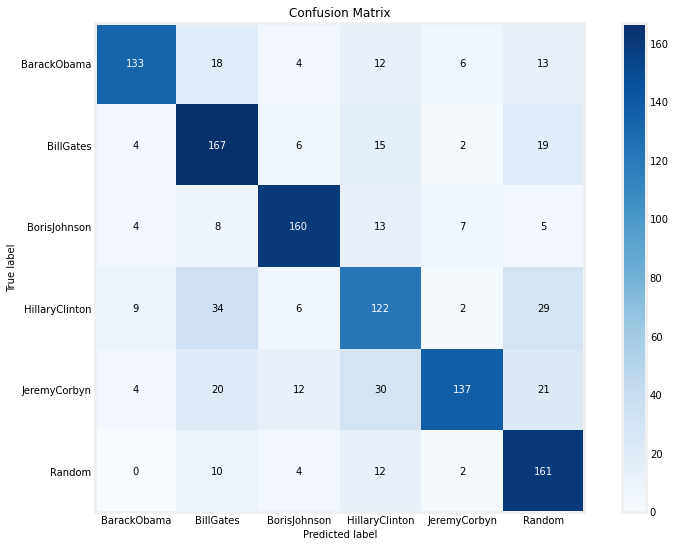

In [25]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_rand_predicted,
    figsize=(12,9))